In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
%matplotlib inline
sns.set()
import sys
from matplotlib.colors import ListedColormap
# Add the directory containing outliers.py to the system path
sys.path.append(r'C:\Users\mostafa\AI&ML\File-important')

# Import the remove_outliers_iqr function
from outliers import remove_outliers_iqr


In [4]:
df=pd.read_csv(r"C:\Users\mostafa\AI&ML\Full-Projects\Mental-health-Prediction\mental_health.csv")


# EDA

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Occupation               1000 non-null   object 
 4   Country                  1000 non-null   object 
 5   Mental_Health_Condition  1000 non-null   object 
 6   Severity                 499 non-null    object 
 7   Consultation_History     1000 non-null   object 
 8   Stress_Level             1000 non-null   object 
 9   Sleep_Hours              1000 non-null   float64
 10  Work_Hours               1000 non-null   int64  
 11  Physical_Activity_Hours  1000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [6]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Occupation', 'Country',
       'Mental_Health_Condition', 'Severity', 'Consultation_History',
       'Stress_Level', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours'],
      dtype='object')

In [7]:
df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5


In [8]:
df.tail()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
995,996,46,Non-binary,Other,Germany,No,NaN,Yes,Low,9.3,50,0
996,997,31,Male,Sales,Canada,No,NaN,No,High,4.5,37,6
997,998,33,Female,IT,Germany,No,High,Yes,Medium,9.7,73,10
998,999,42,Female,Finance,Australia,Yes,NaN,No,Medium,6.5,79,8
999,1000,43,Prefer not to say,Sales,Germany,No,Low,Yes,Low,6.0,61,7


In [9]:
df.sample(5)

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
430,431,40,Prefer not to say,Sales,Canada,Yes,Medium,Yes,Medium,6.0,31,8
748,749,34,Non-binary,IT,USA,Yes,NaN,Yes,High,6.3,34,5
475,476,46,Female,Healthcare,UK,Yes,Low,Yes,Low,8.6,59,4
298,299,37,Male,Education,USA,No,NaN,No,High,5.2,75,1
718,719,30,Male,Other,Canada,Yes,Medium,No,Low,6.5,51,7


In [10]:
df.size

12000

In [11]:
df.shape

(1000, 12)

In [12]:
df.dtypes

User_ID                      int64
Age                          int64
Gender                      object
Occupation                  object
Country                     object
Mental_Health_Condition     object
Severity                    object
Consultation_History        object
Stress_Level                object
Sleep_Hours                float64
Work_Hours                   int64
Physical_Activity_Hours      int64
dtype: object

In [13]:
df.isna().sum()

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64

<Axes: >

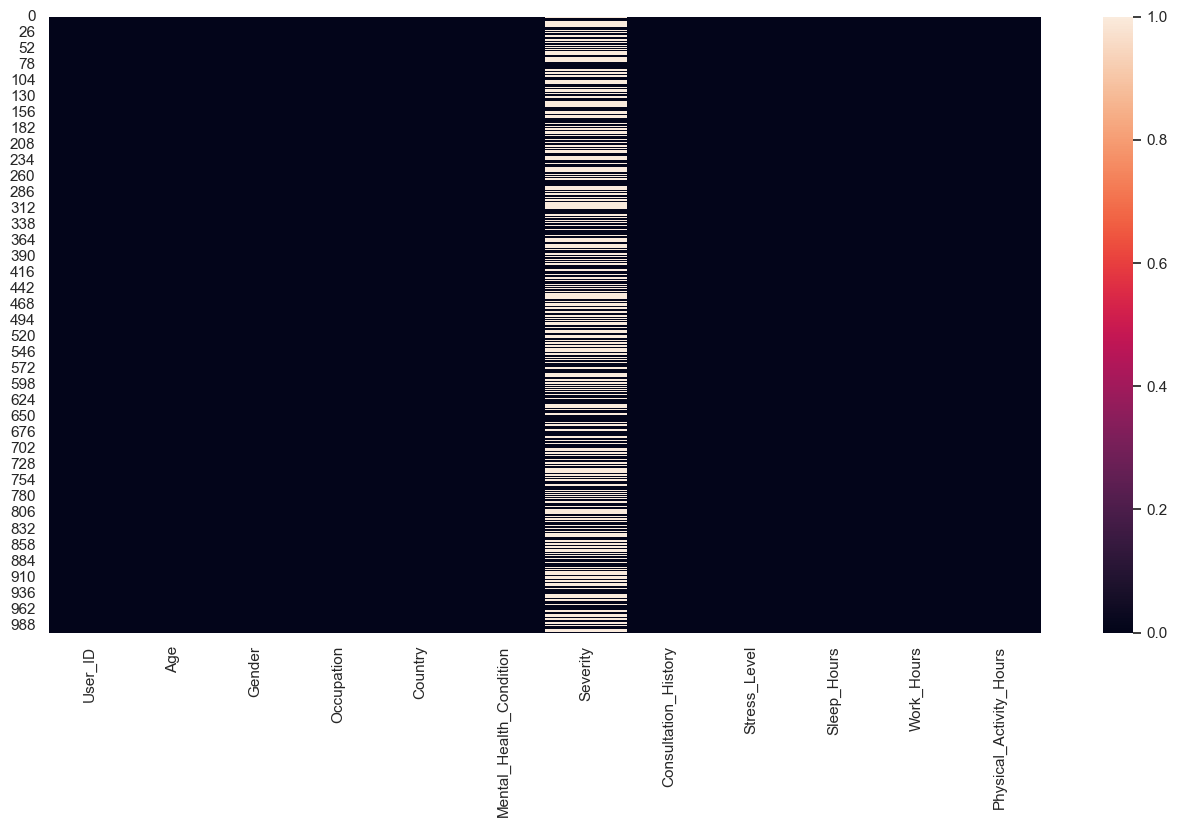

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isna())

In [15]:
df[df.duplicated()]

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours


In [16]:
df.duplicated().sum()

0

In [17]:
df['Age'].describe()

count    1000.00000
mean       41.89200
std        13.97475
min        18.00000
25%        30.00000
50%        42.00000
75%        54.00000
max        65.00000
Name: Age, dtype: float64

In [18]:
df['Gender'].unique()

array(['Non-binary', 'Female', 'Male', 'Prefer not to say'], dtype=object)

C:\Users\mostafa\AppData\Local\Temp\ipykernel_12404\1943206613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='Gender',palette='cubehelix',width=0.2)


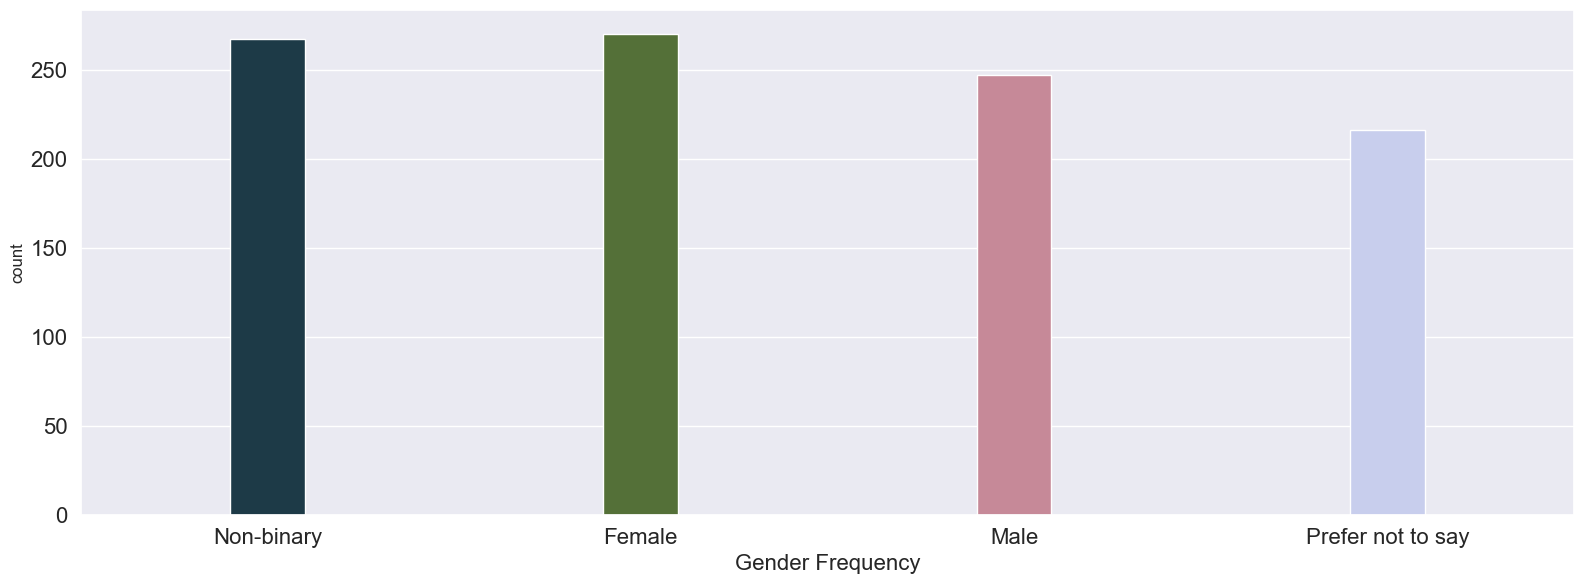

In [19]:
plt.figure(figsize=(16,6))
sns.countplot(df,x='Gender',palette='cubehelix',width=0.2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Gender Frequency',fontsize=16)
plt.tight_layout()

In [20]:
# plt.figure(figsize=(14,6))
# sns.countplot(df,y='Age_Category',hue='Gender',palette='cubehelix')
# plt.tight_layout()

In [21]:
df['Gender'].describe()

count       1000
unique         4
top       Female
freq         270
Name: Gender, dtype: object

In [22]:
df['Occupation'].unique()

array(['Sales', 'Education', 'Other', 'Healthcare', 'IT', 'Engineering',
       'Finance'], dtype=object)

In [23]:
df['Occupation'].value_counts()

Occupation
Other          161
Healthcare     149
Engineering    148
Finance        139
Sales          135
Education      135
IT             133
Name: count, dtype: int64

C:\Users\mostafa\AppData\Local\Temp\ipykernel_12404\3536452760.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='Occupation',width=0.4,palette='rocket')


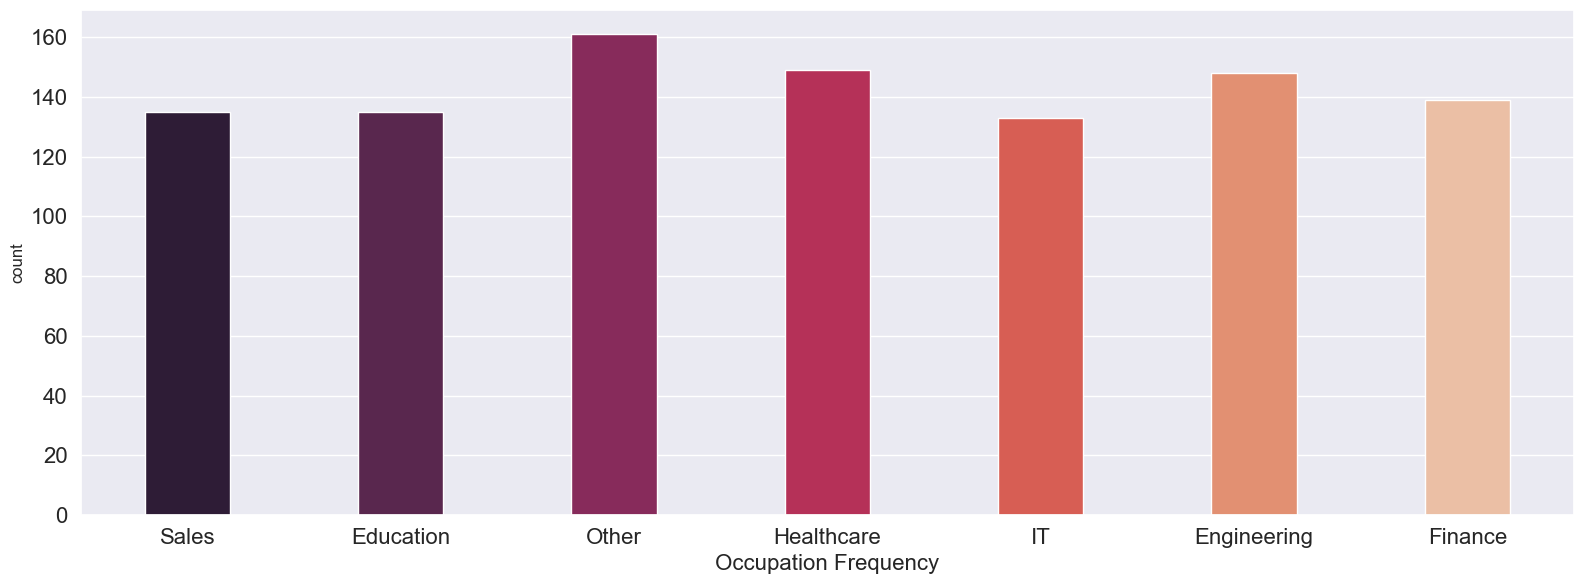

In [24]:
plt.figure(figsize=(16, 6))
sns.countplot(df,x='Occupation',width=0.4,palette='rocket')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Occupation Frequency',fontsize=16)
plt.tight_layout()


C:\Users\mostafa\AppData\Local\Temp\ipykernel_12404\1987085040.py:3: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



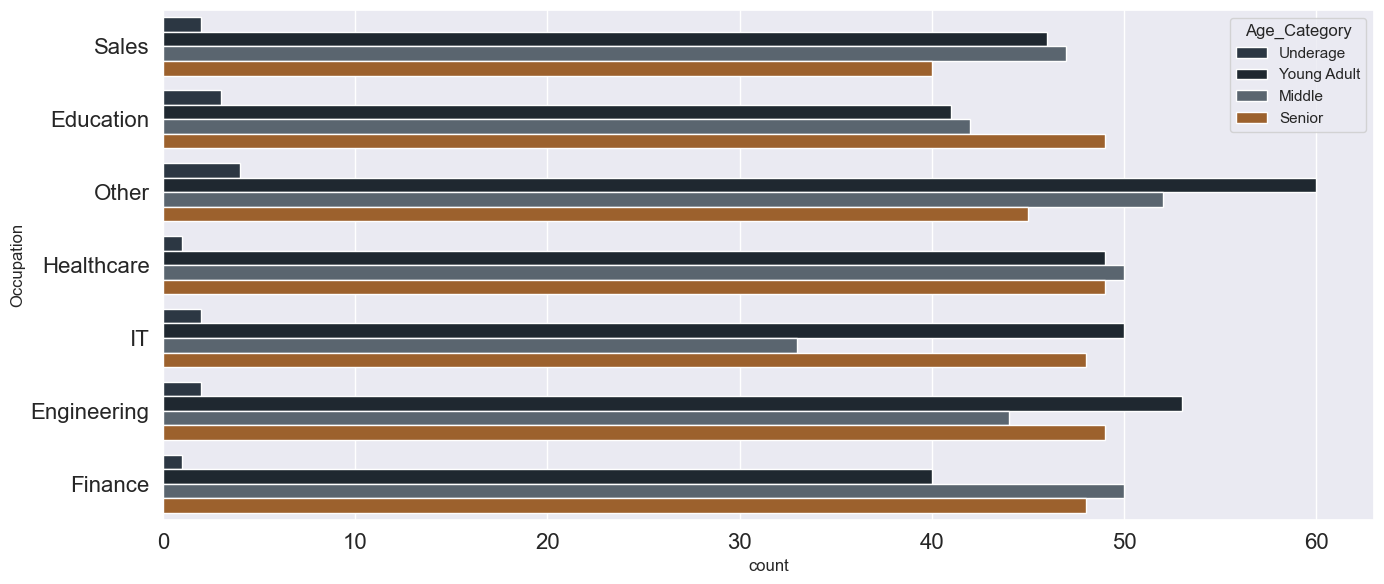

In [58]:
plt.figure(figsize=(14,6))
dark_vibrance_palette = ['#283747', '#1C2833', '#566573', '#AF601A', '#922B21']
sns.countplot(df,y='Occupation',hue='Age_Category',palette=dark_vibrance_palette)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

In [ ]:
df['Occupation'].describe()

In [ ]:
df['Country'].unique()

In [ ]:
df['Country'].value_counts()

In [ ]:
df['Country'].describe()

In [ ]:
df['Mental_Health_Condition'].unique()

     - "Yes" means the person has a mental health condition and is therefore not considered mentally healthy"
     - "No" means the person does not have a mental health condition and is considered mentally healthy.


In [ ]:
df['Mental_Health_Condition'].describe()


In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(df,x='Country',y='Physical_Activity_Hours',hue='Mental_Health_Condition',palette='rocket_r')
plt.legend(loc='upper right')

In [26]:
df['Severity'].unique()

array(['Medium', nan, 'High', 'Low'], dtype=object)

In [27]:
df['Severity'].describe()

count     499
unique      3
top       Low
freq      176
Name: Severity, dtype: object

In [28]:
df['Consultation_History'].unique()

array(['Yes', 'No'], dtype=object)

C:\Users\mostafa\AppData\Local\Temp\ipykernel_12404\571771093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,y='Consultation_History',palette='rocket',width=0.3)


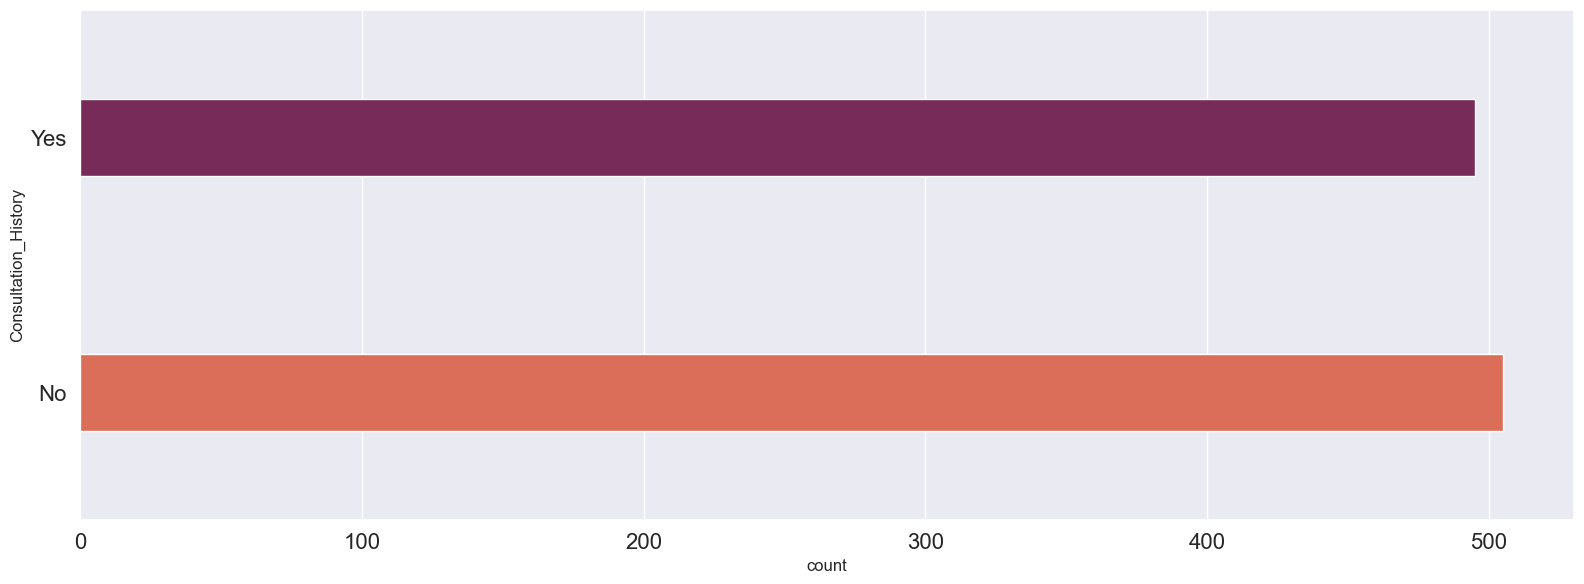

In [29]:
plt.figure(figsize=(16,6))
sns.countplot(df,y='Consultation_History',palette='rocket',width=0.3)
plt.yticks(fontsize=(16))
plt.xticks(fontsize=(16))
plt.tight_layout()


    - Yes: A person has  consultation with a specialist 
    - No: A person Not has  consultation Before

In [30]:
df['Consultation_History'].describe()

count     1000
unique       2
top         No
freq       505
Name: Consultation_History, dtype: object

In [31]:
df['Stress_Level'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

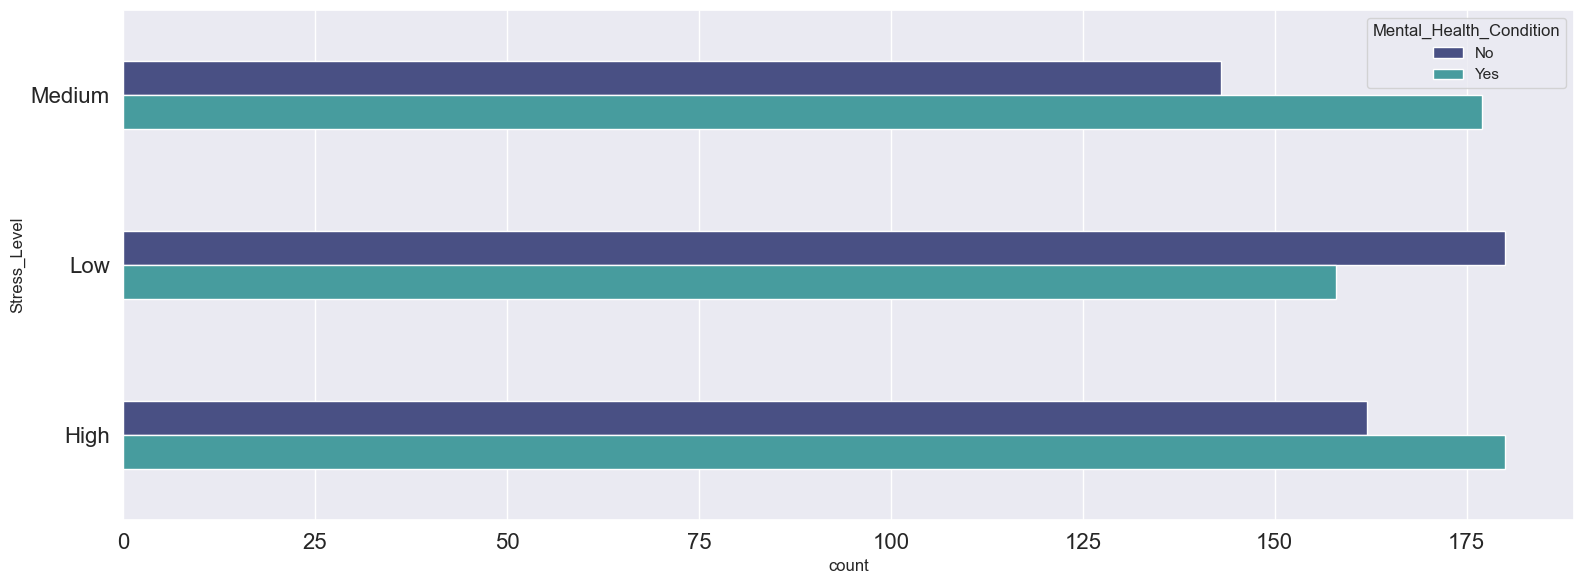

In [32]:
plt.figure(figsize=(16,6))
sns.countplot(df,y='Stress_Level',palette='mako',width=0.4,hue='Mental_Health_Condition')
plt.yticks(fontsize=(16))
plt.xticks(fontsize=(16))
plt.tight_layout()

In [33]:
df['Stress_Level'].describe()

count     1000
unique       3
top       High
freq       342
Name: Stress_Level, dtype: object

In [34]:
df['Stress_Level'].value_counts()


Stress_Level
High      342
Low       338
Medium    320
Name: count, dtype: int64

In [35]:
df['Sleep_Hours'].describe()

count    1000.000000
mean        7.095600
std         1.713861
min         4.000000
25%         5.600000
50%         7.100000
75%         8.500000
max        10.000000
Name: Sleep_Hours, dtype: float64

In [36]:
df['Work_Hours'].describe()

count    1000.000000
mean       54.621000
std        14.709035
min        30.000000
25%        42.000000
50%        55.000000
75%        67.000000
max        80.000000
Name: Work_Hours, dtype: float64

In [37]:
df['Physical_Activity_Hours'].describe()

count    1000.000000
mean        5.134000
std         3.081808
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Physical_Activity_Hours, dtype: float64

# Data Prprocessing
   - Cleaning & Outliers
   - Transformation & Preparation
   - Analysis
   - Visualization

##### Cleaning

In [38]:
df.drop(labels='User_ID',axis=1,inplace=True)

In [39]:
df.drop('Severity',axis=1,inplace=True)

### Outliers 

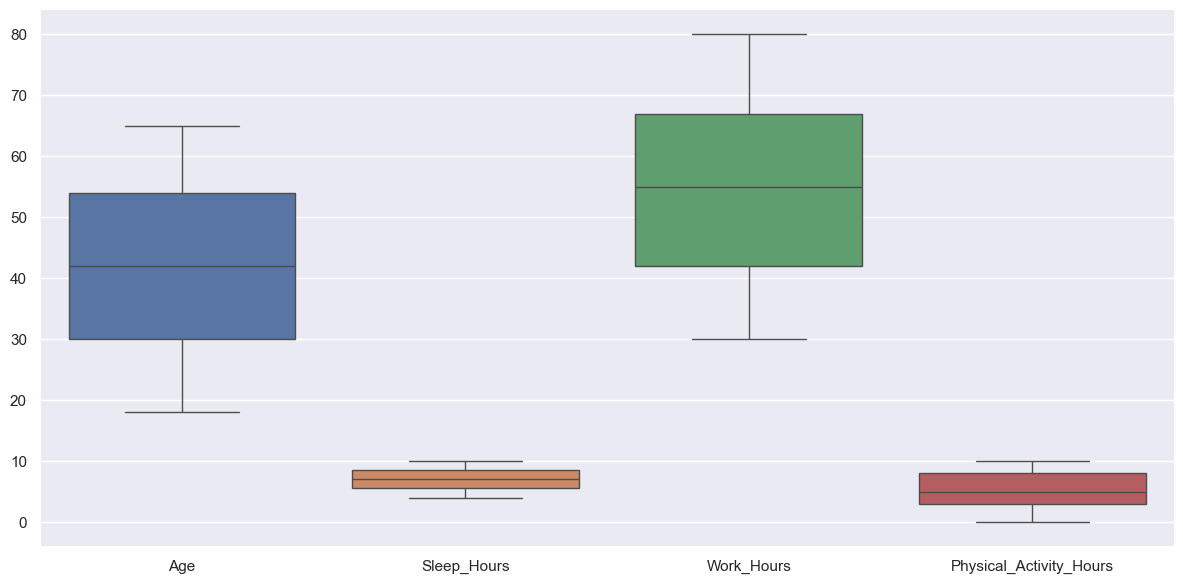

In [40]:
sns.catplot(df,kind='box',aspect=2,height=6)


In [41]:
remove_outliers_iqr(df,'Work_Hours')

0      46
1      47
2      58
3      30
4      62
       ..
995    50
996    37
997    73
998    79
999    61
Name: Work_Hours, Length: 1000, dtype: int64

In [42]:
remove_outliers_iqr(df,'Physical_Activity_Hours')

0       5
1       8
2      10
3       2
4       5
       ..
995     0
996     6
997    10
998     8
999     7
Name: Physical_Activity_Hours, Length: 1000, dtype: int64

In [43]:
remove_outliers_iqr(df,'Sleep_Hours')

0      7.1
1      7.5
2      8.4
3      9.8
4      4.9
      ... 
995    9.3
996    4.5
997    9.7
998    6.5
999    6.0
Name: Sleep_Hours, Length: 1000, dtype: float64

### Transformation & preparation

In [44]:
df.head()

,Age,Gender,Occupation,Country,Mental_Health_Condition,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,36,Non-binary,Sales,Canada,No,Yes,Medium,7.1,46,5
1,34,Female,Education,UK,Yes,No,Low,7.5,47,8
2,65,Non-binary,Sales,USA,Yes,No,Low,8.4,58,10
3,34,Male,Other,Australia,No,No,Medium,9.8,30,2
4,22,Female,Healthcare,Canada,Yes,No,Medium,4.9,62,5


In [45]:
age=df['Age'].unique()
age.sort()
age

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
      dtype=int64)

In [46]:
df.insert(1, 'Age_Category', pd.cut(x=df['Age'], bins=[0, 18, 34, 50, 65], labels=['Underage', 'Young Adult', 'Middle', 'Senior']))
df.sample(4)

,Age,Age_Category,Gender,Occupation,Country,Mental_Health_Condition,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
546,38,Middle,Prefer not to say,Finance,USA,Yes,Yes,Medium,4.0,62,10
245,44,Middle,Non-binary,Other,India,No,Yes,Low,9.1,60,5
325,19,Young Adult,Female,Finance,Canada,No,Yes,High,7.9,76,3
781,30,Young Adult,Male,Engineering,UK,No,Yes,High,7.3,40,6


In [47]:
df['Gender']=df['Gender'].replace({'Non-binary':'Other','Female':'F','Male':'M'})


In [48]:
df['Gender']=df['Gender'].replace({'Prefer not to say':'Priv'})
df.sample(6)

,Age,Age_Category,Gender,Occupation,Country,Mental_Health_Condition,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
586,25,Young Adult,Other,IT,Australia,Yes,No,High,6.9,71,1
285,27,Young Adult,Priv,Sales,Other,No,Yes,Low,7.0,56,2
71,62,Senior,M,Education,Germany,Yes,Yes,Low,5.5,74,6
769,50,Middle,F,Finance,UK,Yes,Yes,High,9.0,78,10
245,44,Middle,Other,Other,India,No,Yes,Low,9.1,60,5
405,64,Senior,Priv,Healthcare,India,No,No,Low,4.8,37,9


In [52]:
df['Mental_Health_Condition']=df['Mental_Health_Condition'].astype('category').cat.codes
df['Consultation_History']=df['Consultation_History'].astype('category').cat.codes
df['Stress_Level']=df['Stress_Level'].astype('category').cat.codes

df['Stress_Level']=df['Stress_Level'].astype('category').cat.codes
df['Stress_Level']=df['Stress_Level'].map({0:1,1:2,2:3})